In [3]:
# Tensorflow imports 
import tensorflow.keras as kr
import numpy as np
import pandas as pd
# Plotting the data and prediction
import matplotlib.pyplot as plt

In [4]:
# Pull the dataset from github repo - assign the collumn names
dataset = pd.read_csv('https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv', names=['speed', 'power'] , skipinitialspace=True, skiprows=1, engine="python")
# Create a copy of the dataset
data_copy = dataset.copy()

# Train the columns
x_train = data_copy.pop('speed')
y_train = data_copy.pop('power')

# Train a different model.
model = kr.models.Sequential()

model.add(kr.layers.Flatten()) 
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(25, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

# Fitting the model - epochs=600 gave me the most accurate response with a batch size of 10
model.fit(x_train, y_train, epochs=600, batch_size=10)

=============] - 0s 531us/step - loss: 299.3610
Epoch 369/600
50/50 [==============================] - 0s 510us/step - loss: 279.9525
Epoch 370/600
50/50 [==============================] - 0s 510us/step - loss: 204.1669
Epoch 371/600
50/50 [==============================] - 0s 490us/step - loss: 124.1380
Epoch 372/600
50/50 [==============================] - 0s 510us/step - loss: 182.2604
Epoch 373/600
50/50 [==============================] - 0s 531us/step - loss: 220.5161
Epoch 374/600
50/50 [==============================] - 0s 490us/step - loss: 227.7154
Epoch 375/600
50/50 [==============================] - 0s 510us/step - loss: 220.9032
Epoch 376/600
50/50 [==============================] - 0s 510us/step - loss: 247.5796
Epoch 377/600
50/50 [==============================] - 0s 510us/step - loss: 254.0824
Epoch 378/600
50/50 [==============================] - 0s 490us/step - loss: 226.7747
Epoch 379/600
50/50 [==============================] - 0s 510us/step - loss: 175.9327
Epoch 

INFO:tensorflow:Assets written to: models\model\assets


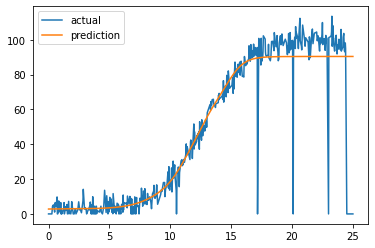

In [5]:
plt.plot(x_train, y_train, label='actual')
plt.plot(x_train, model.predict(x_train), label='prediction')
plt.legend()

# Save the model to a folder to be accessed using Flask
model.save('models\model')

### References
* [Ian McLoughlin's Github Repository - Keras Linear](https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-linear.ipynb)
* [Tensorflow Basic Regression](https://www.tensorflow.org/tutorials/keras/regression)
* [Tensorflow Save and Load Models](https://www.tensorflow.org/tutorials/keras/save_and_load)